In [4]:
from simulate import simulate
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import shutil
from slimstampen.spacingmodel import SpacingModel


In [5]:
SIMTIME = 12
NUMF = 20

df = pd.DataFrame()

sm = SpacingModel()

pd.concat([df, simulate(sm, SIMTIME, NUMF, 0.3)], ignore_index=True)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,sim_time,forget_threshold,num_facts,model_sof,c,s,F,t0
0,0.2875,0.200781,0.315625,0.274609,0.328516,0.249609,0.201172,0.201172,0.292578,0.432422,...,0.248828,0.266016,12.0,-0.8,20.0,0.3,0.25,0.3,1.0,0.3


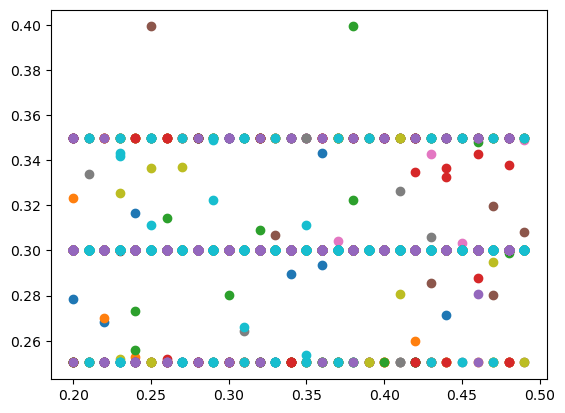

In [8]:
#Simulating different F parameters

SIMTIME = 1
NUMFACTS = 20
NUMREPS = 5
s = 0.3
c = 0.25
F = 3

sm = SpacingModel()

df = pd.DataFrame()
for msof in [x / 100 for x in range(20, 50)]:
    for _ in range(NUMREPS):
        df = pd.concat([df, simulate(sm, SIMTIME, NUMFACTS, msof, c, s, F)], ignore_index=True)

#df.to_csv("dataanalysis\data\F\\3")


for index, row in df.iterrows():
    plt.scatter([row["model_sof"] for _ in range(NUMFACTS)], row[0:NUMFACTS])

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

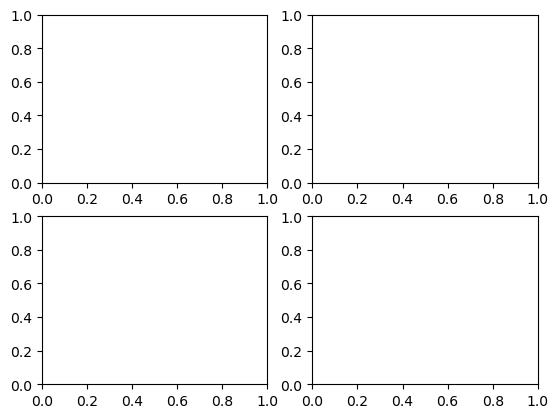

In [35]:
#plotting different memory model F parameters
def data_trimming(path):
    df = pd.read_csv(path)
    avg1 = []
    msof1 = []

    for index, row in df.iterrows():
        if index % 5 == 0:
        
            facts = row[1:int(row["num_facts"] + 1)]
            facts = [x for x in facts if x != sm.DEFAULT_ALPHA]
            avg1.append((sum(facts) / len(facts)))
            msof1.append(row["model_sof"])
    return avg1, msof1

avg1, msof1 = data_trimming("dataanalysis\data\F\\1")
avg2, msof2 = data_trimming("dataanalysis\data\F\\0.75")
avg3, msof3 = data_trimming("dataanalysis\data\F\\0.5")
avg4, msof4 = data_trimming("dataanalysis\data\F\\3")

figure, ax = plt.subplots(2, 2)

ax[0, 0].scatter(msof1, avg1, c="g")
ax[0, 1].scatter(msof2, avg2, c="r")
ax[1, 0].scatter(msof3, avg3, c="b")
ax[1, 1].scatter(msof4, avg4, c="m")

plt.legend([ "F = 3", "F = 1", "F = 0.75", "F = 0.5"])
plt.plot([x / 100 for x in range(20, 50)], [x / 100 for x in range(20, 50)], "--r")
plt.xlabel("ModelSOF")
plt.ylabel("MemoryLabSOF estimation")
plt.grid(True)
plt.suptitle("MemoryLab sof VS Model sof with varying model F params")
plt.show()


3


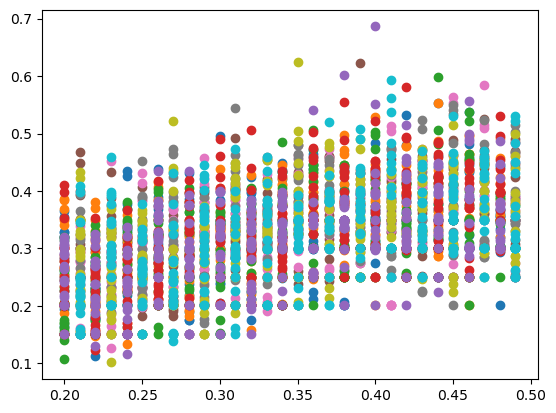

4


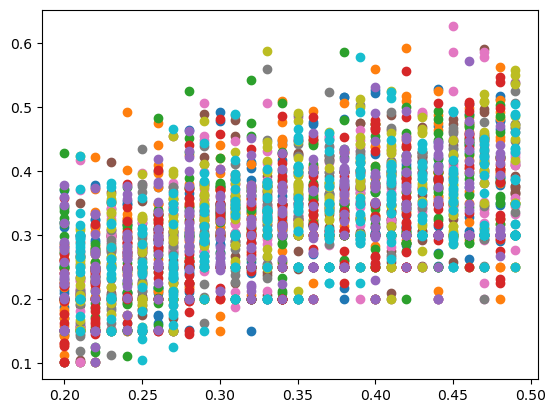

5


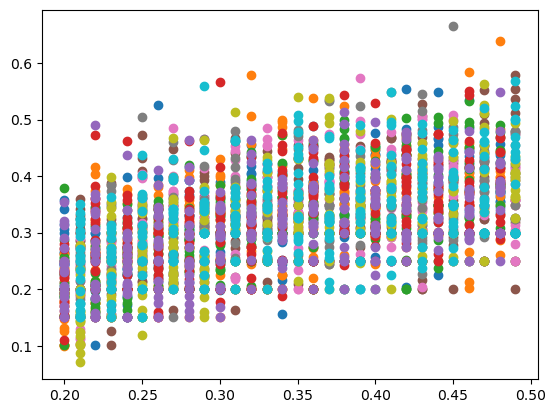

In [11]:

NUMPOINTS = 5

#simulate/memory Parameters
SIMTIME = 12
NUMFACTS = 20

#Spacing Model Parameters

s = 0.3
c = 0.25
F = 1

for min_pres in range(3, 6):
    sm = SpacingModel(min_pres=min_pres)

    df = pd.DataFrame()
    for msof in [x / 100 for x in range(20, 50)]:
        for _ in range(NUMPOINTS):
            df = pd.concat([df, simulate(sm, SIMTIME, NUMFACTS, msof, c, s, F)], ignore_index=True)

    df.to_csv(f"dataanalysis\data\min_pres\\{min_pres}")


    for index, row in df.iterrows():
        plt.scatter([row["model_sof"] for _ in range(NUMFACTS)], row[0:NUMFACTS])
    print(f"{min_pres}")
    plt.show()

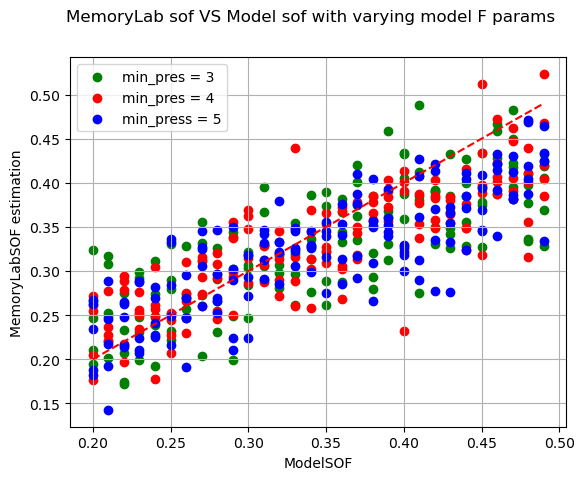

In [17]:
#plotting different memory model bobo parameters
def data_trimming(path):
    df = pd.read_csv(path)
    avg1 = []
    msof1 = []

    for index, row in df.iterrows():
        if index % 1 == 0:
        
            facts = row[1:int(row["num_facts"] / 5 + 1)]
            facts = [x for x in facts if x != sm.DEFAULT_ALPHA]
            avg1.append((sum(facts) / len(facts)))
            msof1.append(row["model_sof"])
    return avg1, msof1

avg1, msof1 = data_trimming("dataanalysis\data\min_pres\\3")
avg2, msof2 = data_trimming("dataanalysis\data\min_pres\\4")
avg3, msof3 = data_trimming("dataanalysis\data\min_pres\\5")

plt.scatter(msof1, avg1, c="g")
plt.scatter(msof2, avg2, c="r")
plt.scatter(msof3, avg3, c="b")

plt.legend([ "min_pres = 3", "min_pres = 4", "min_press = 5"])
plt.plot([x / 100 for x in range(20, 50)], [x / 100 for x in range(20, 50)], "--r")
plt.xlabel("ModelSOF")
plt.ylabel("MemoryLabSOF estimation")
plt.grid(True)
plt.suptitle("MemoryLab sof VS Model sof with varying model F params")
plt.show()

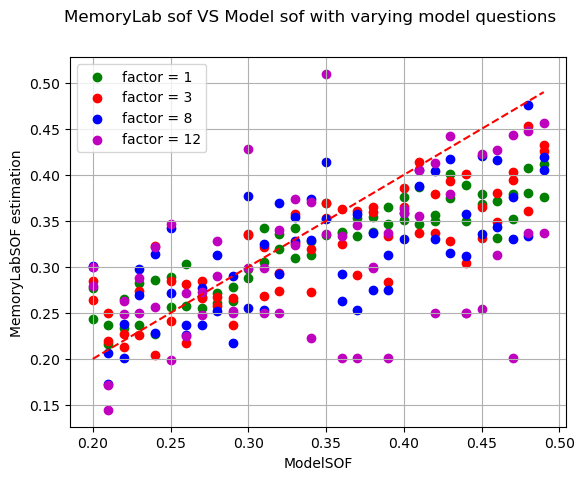

In [25]:
#plotting different memory model question accuracy
def data_trimming(path, factor):
    df = pd.read_csv(path)
    avg1 = []
    msof1 = []

    for index, row in df.iterrows():
        if index % 5 == 0:
        
            facts = row[1:int(row["num_facts"] / factor + 1)]
            facts = [x for x in facts if x != sm.DEFAULT_ALPHA]
            avg1.append((sum(facts) / len(facts)))
            msof1.append(row["model_sof"])
    return avg1, msof1

avg1, msof1 = data_trimming("dataanalysis\data\practdata", 1)
avg2, msof2 = data_trimming("dataanalysis\data\practdata", 3)
avg3, msof3 = data_trimming("dataanalysis\data\practdata", 8)
avg4, msof4 = data_trimming("dataanalysis\data\practdata", 12)

plt.scatter(msof1, avg1, c="g")
plt.scatter(msof2, avg2, c="r")
plt.scatter(msof3, avg3, c="b")
plt.scatter(msof4, avg4, c="m")

plt.legend([ "factor = 1", "factor = 3", "factor = 8", "factor = 12"])
plt.plot([x / 100 for x in range(20, 50)], [x / 100 for x in range(20, 50)], "--r")
plt.xlabel("ModelSOF")
plt.ylabel("MemoryLabSOF estimation")
plt.grid(True)
plt.suptitle("MemoryLab sof VS Model sof with varying model questions")
plt.show()